# **Iris Flower Classification**



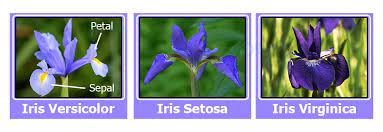

## **Project Overview** 
This project is a supervised classification problem focused on Iris flower species identification. Its primary aim is to develop a machine learning model that can accurately classify Iris flowers into one of three distinct species, namely 'setosa,' 'versicolor,' and 'virginica.' The classification is based on the flowers' sepal and petal measurements, making use of a dataset containing these numerical features. The target variable, 'species,' is a categorical attribute with three exclusive classes. The project's objective is to create a robust model capable of accurately categorizing Iris flowers by leveraging their morphological characteristics

## **Business Understanding**

Problem Statement: The goal of this project is to develop a machine learning model that can accurately classify Iris flowers into their respective species (setosa, versicolor, and virginica) based on their sepal and petal measurements.     
Relevance: Accurate classification of Iris flowers is valuable for botanists, horticulturists, and researchers studying plant species. It can also be used for educational purposes in introductory machine learning and classification tasks.

### Project Objectives  

Primary Objective:
* Train a machine learning model to classify Iris flowers into three species based on sepal and petal measurements.

Secondary Objectives:

* Explore and analyze the Iris dataset to gain insights into the characteristics of the data.
* Preprocess the data to make it suitable for training a machine learning model.
* Select an appropriate machine learning algorithm for classification.
* Train and evaluate the model's performance using relevant metrics.
* Create a user-friendly interface for users to input sepal and petal measurements and receive species predictions.


## **Data Understanding**

Data Source: The dataset used for this project is the Iris dataset obtained from Kaggle :[Iris Flower Dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

Data Description: The dataset consists of the following columns:  

``sepal_length``: Sepal length in centimeters (numerical)  
``sepal_width``: Sepal width in centimeters (numerical)  
``petal_length``: Petal length in centimeters (numerical)    
``petal_width``: Petal width in centimeters (numerical)  
``species``: The target variable, indicating the Iris species (categorical - 'setosa', 'versicolor', 'virginica')  

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
class DataProcessor:
    def __init__(self, df):
        # Initialize with a DataFrame.
        self.df = df

    def get_info(self):
        # Get basic DataFrame info 
        return self.df.info()
    
    def get_summary_statistics(self):
        # Get summary statistics for numerical columns.
        return self.df.describe()
    
    def get_dtypes(self):
        # Get data types of columns.
        return self.df.dtypes
    
    def get_missing_values(self):
        # Get the count of missing (null) values in each column.
        return self.df.isnull().sum()
    def get_value_counts(self):
        # Get value counts for all categorical columns.
        categorical_columns = self.df.select_dtypes(include=['object']).columns
        value_counts = {}
        for col in categorical_columns:
            value_counts[col] = self.df[col].value_counts()
        return value_counts
    
        

In [3]:
#load the dataset
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Initialize the DataProcessor class
dp = DataProcessor(df)

In [5]:
# get summary of the dataframe
dp.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# get summary statistics
dp.get_summary_statistics()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# check the datatypes
dp.get_dtypes()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# value count
dp.get_value_counts()

{'species': Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: species, dtype: int64}

In [9]:
df.shape

(150, 5)

## **Data Preparation**

#### Missing values

In [10]:
dp.get_missing_values()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data set has no missing values

#### Check for duplicates

In [11]:
# check for duplicates
df.duplicated().sum()

3

#### Remove duplicates

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

### check for outliers and drop them

In [13]:
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

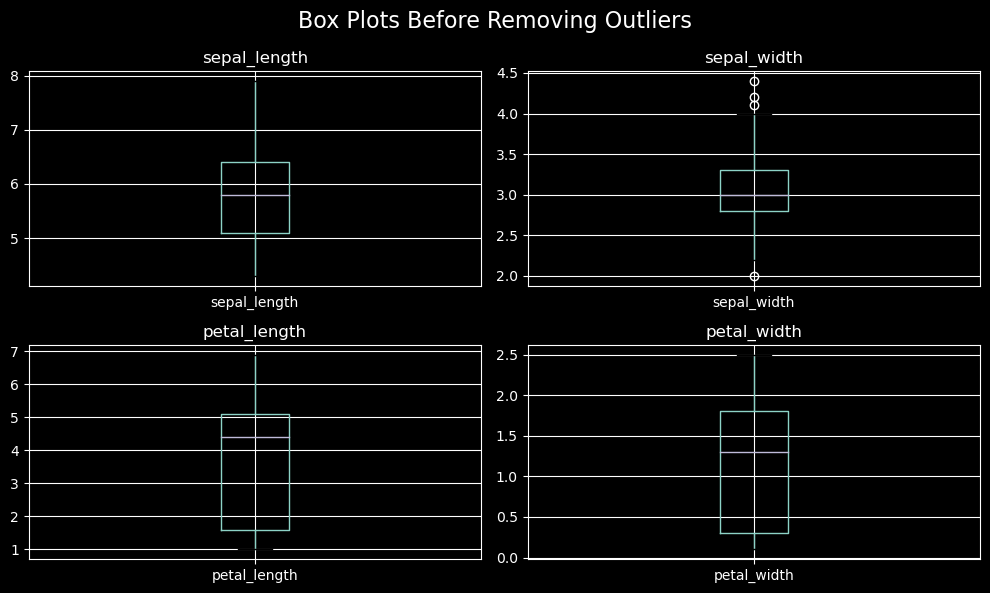

Number of rows with outliers before removal: 11


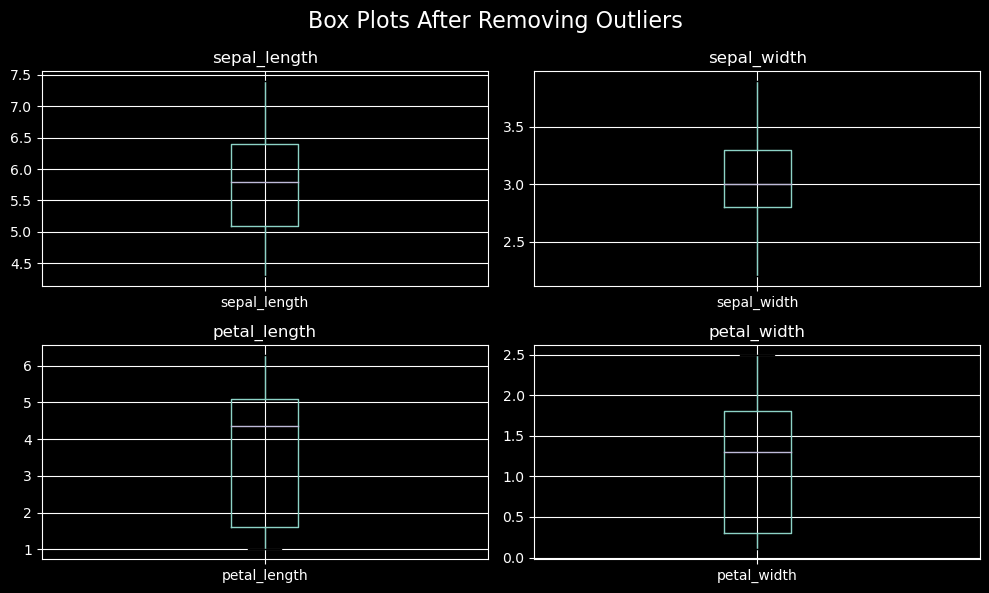

Number of rows after removing outliers: 136


In [14]:
# Set the dark_background style
plt.style.use('dark_background')

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df_cleaned = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df_cleaned.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned))


## **Exploratory Data Analysis**

### Univariate Analysis
Univariate analysis focuses on understanding the distribution of individual features  

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Distribution of Sepal Length

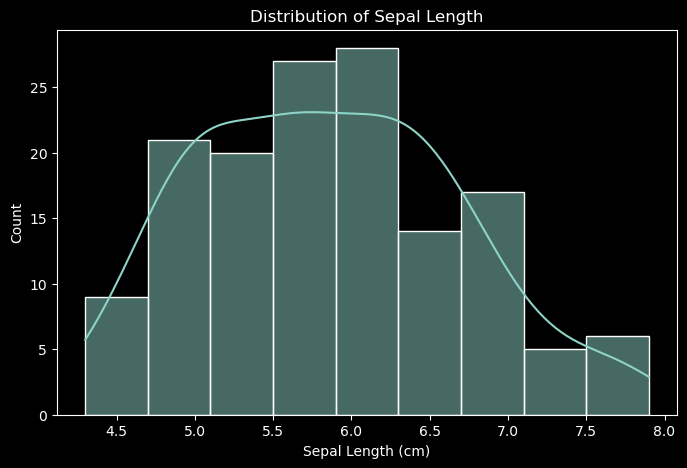

In [16]:
# Univariate analysis for sepal length
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.show()

$inference$ 
*  The histogram plot with a KDE (Kernel Density Estimation) overlay shows that the distribution of sepal length is approximately bell-shaped or Gaussian. It suggests that sepal length follows a somewhat normal distribution.
* The of the sepal lenght lies between 4.5 cm to 7 cm  
* The peak of the distribution appears to be around 5.5 to 6.4 centimeters.
* The distribution spans from approximately 4.3 to 7.9 centimeters, indicating that sepal lengths vary across a relatively wide range.

### Distribution of Iris Species

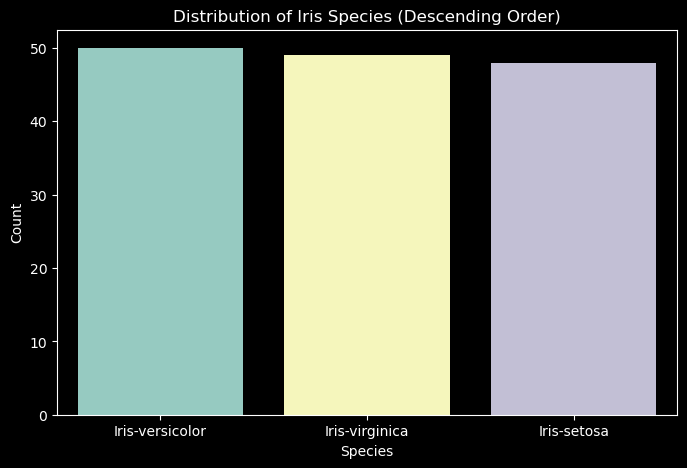

In [17]:
# Compute the species counts
species_counts = df['species'].value_counts().reset_index()
species_counts.columns = ['species', 'count']
species_counts = species_counts.sort_values(by='count', ascending=False)

# Create a countplot to show the distribution of species in descending order
plt.figure(figsize=(8, 5))
sns.barplot(data=species_counts, x='species', y='count', order=species_counts['species'])
plt.title('Distribution of Iris Species (Descending Order)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

The plot illustrates the distribution of Iris species in the dataset. The species are 'setosa,' 'versicolor,' and 'virginica.'   

$inference$ 
* 'versicolor' is the most frequently occurring species in the dataset, followed by ''virginica,' and  'setosa'. This indicates that 'versicolor' specimens are the most abundant, while 'setosa' specimens are the least common among the Iris flowers

### Bivariate Analysis
Bivariate analysis explores relationships between two variables

### Species vs. Petal Length

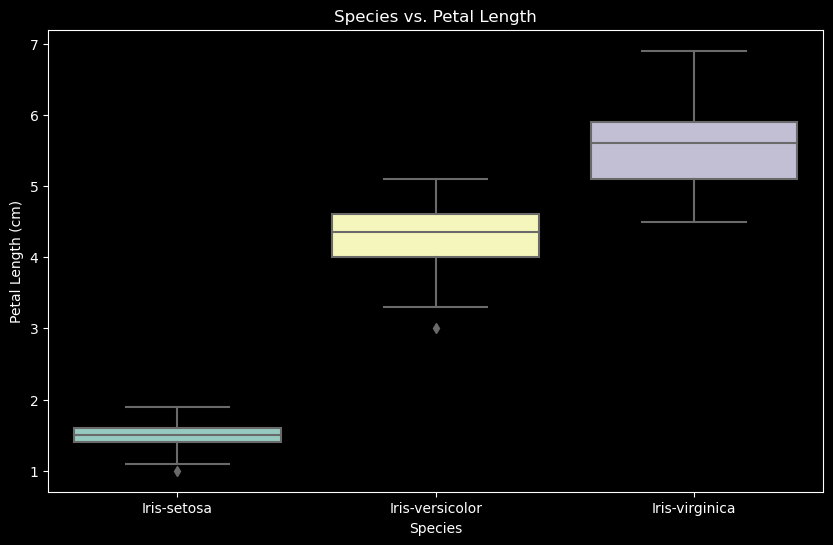

In [18]:
# Create a box plot to visualize the relationship between species and petal length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Species vs. Petal Length')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

$inference$   
* Petal Length Variation by Species: The box plot clearly illustrates the variation in petal length across the three Iris species. 'setosa' has the shortest petal lengths, 'versicolor' falls in the mid-range, and 'virginica' has the longest petals.
* Overlap: There is no overlap between the petal lengths of 'setosa' and 'versicolor,' making it a distinctive feature for distinguishing these two species. However, there is a slight overlap between 'versicolor' and 'virginica,' implying that petal length alone might not be sufficient to distinguish them.


### Sepal Length vs. Sepal Width'

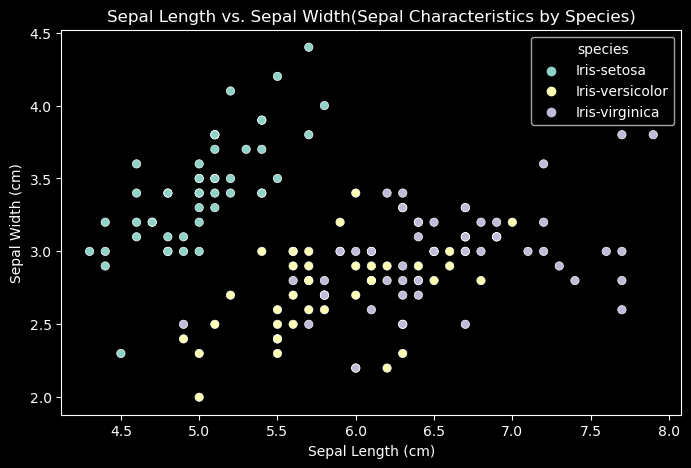

In [19]:
# Bivariate analysis for sepal length vs. sepal width
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs. Sepal Width(Sepal Characteristics by Species)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Sepal Characteristics by Species: The scatterplot visually shows the distribution of sepal length and sepal width for each Iris species, with 'setosa' in blue, 'versicolor' in orange, and 'virginica' in green.    

$inference$
* Setosa Distinction: 'Setosa' species exhibits a clear distinction from the other two species in terms of sepal length and sepal width. It generally has shorter sepal length but wider sepal width compared to 'versicolor' and 'virginica'
* Overlap Between Versicolor and Virginica: 'Versicolor' and 'virginica' have a noticeable overlap in sepal length and sepal width. While 'versicolor' tends to have slightly shorter sepals and 'virginica' slightly longer, the overlap implies that these two species share more similar sepal characteristics than 'setosa.'

### Species vs. Petal Width

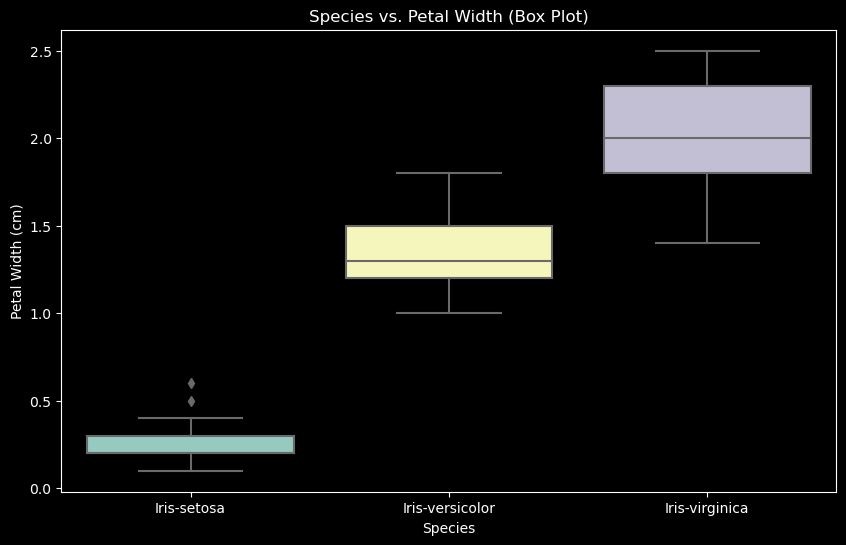

In [20]:
# plot Species vs. Petal Width
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal_width')
plt.title('Species vs. Petal Width (Box Plot)')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()


Petal Width Variation by Species: The box plot clearly illustrates the variation in petal width across the three Iris species.  

$inference$   
* 'setosa' has the narrowest petal widths, 'versicolor' falls in the mid-range, and 'virginica' has the widest petals.
* Distinctive Features: Petal width is a particularly distinctive feature for differentiating 'setosa' from the other two species. The narrow petal width of 'setosa' significantly sets it apart from 'versicolor' and 'virginica.'
* Overlap: There is some overlap between 'versicolor' and 'virginica' in terms of petal width, implying that petal width alone may not be sufficient to distinguish these two species

### Species vs. Sepal Length 

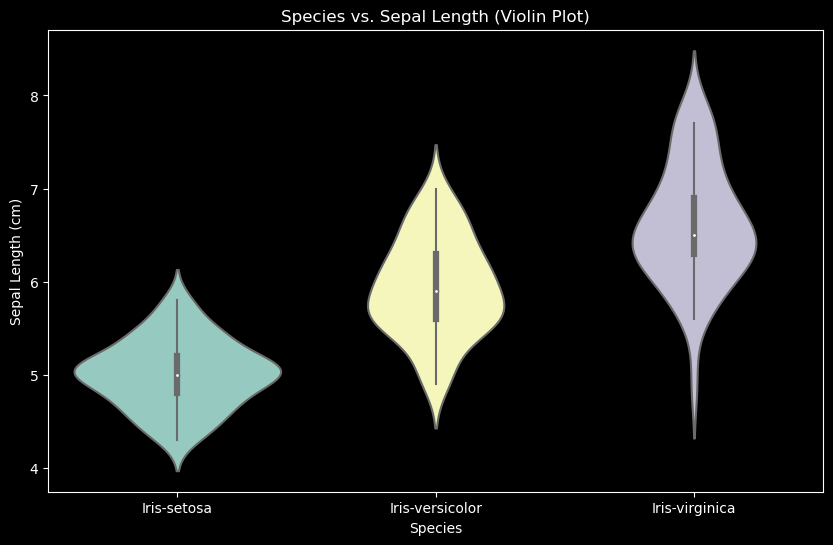

In [21]:
# plot Species vs. Sepal Length 
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='species', y='sepal_length')
plt.title('Species vs. Sepal Length (Violin Plot)')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

Distribution of Sepal Length: The violin plot provides a comprehensive view of the distribution of sepal length for each Iris species. Each violin represents a species ('setosa,' 'versicolor,' and 'virginica') 

$inference$
* Setosa: The 'setosa' species is characterized by shorter sepals (wider distribution), making it distinctive from the other two species.
* Virginica: 'Virginica' has the tallest sepals among the three species and also exhibits a relatively narrow distribution.

### Distribution of Iris Species by Petal width 

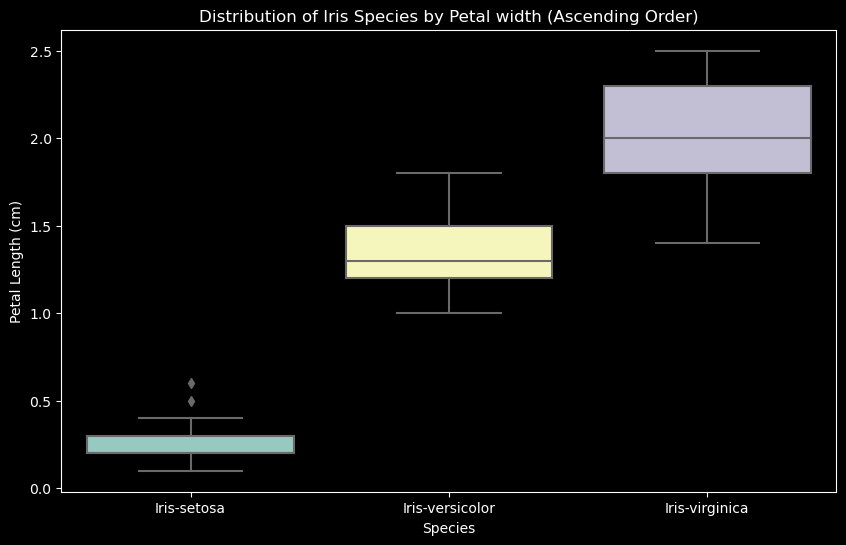

In [22]:
# Create a box plot to show the distribution of species by petal length in ascending order
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal_width', order=df.groupby('species')['petal_length'].median().sort_values().index)
plt.title('Distribution of Iris Species by Petal width (Ascending Order)')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

$inference$
* 'setosa' has the shortest petal length, followed by 'versicolor,' and 'virginica' with the longest petal lengths.
* Petal Width Variation by Species: The plot shows that the petal width varies among the three Iris species. 'setosa' has the narrowest petals, 'versicolor' falls in the mid-range, and 'virginica' has the widest petals. This indicates that 'setosa' has a characteristic of narrower petals despite its shorter petal length.
*  longer petals tend to be wider within each species, which is a logical correlation

### Multivariate Analysis
Multivariate analysis looks at relationships between more than two variables

### Pairplot

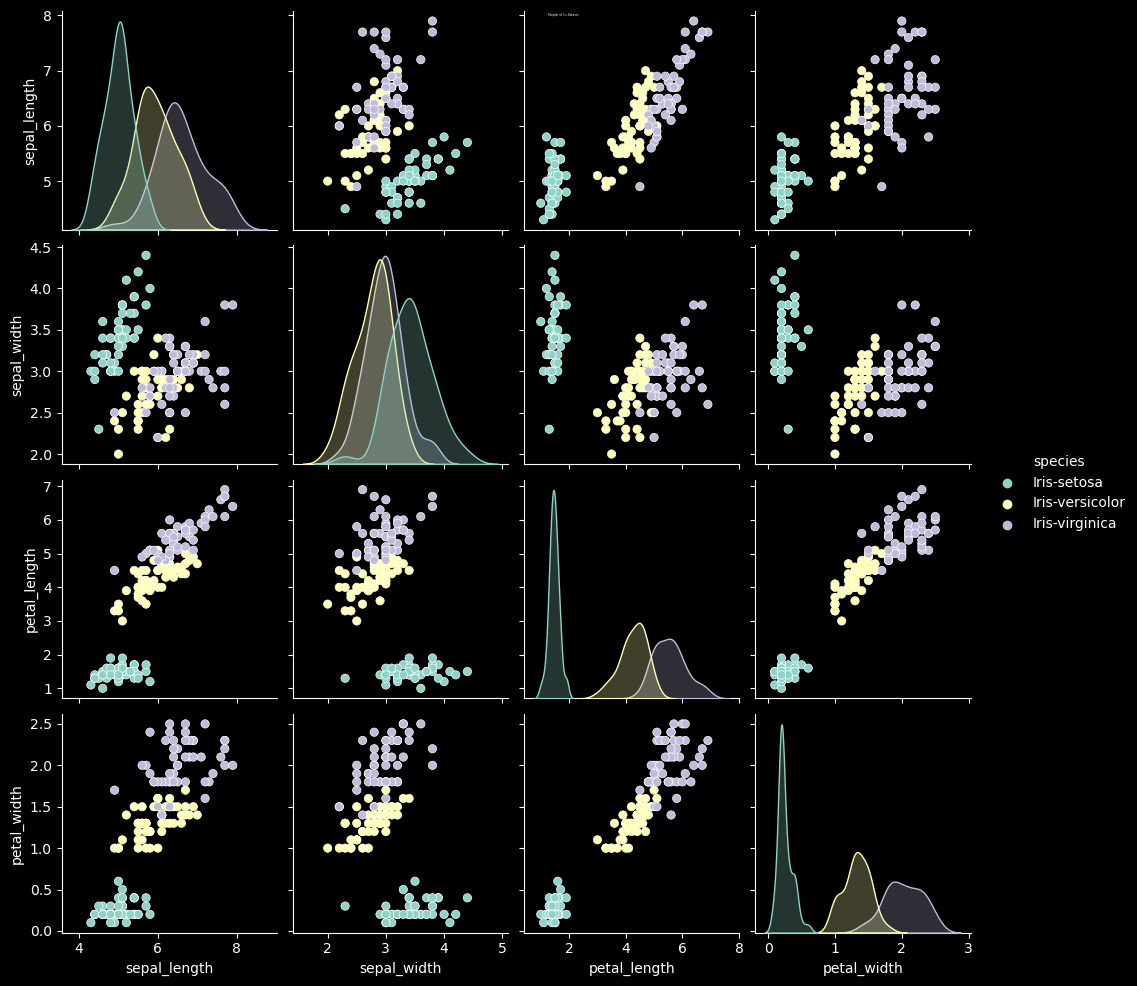

In [23]:
# pairplot
sns.pairplot(data=df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", size=2)
plt.show()


$inference$
* Setosa Distinction: 'Setosa' species exhibits clear separations in terms of sepal length, sepal width, petal length, and petal width. These distinct clusters make 'setosa' easily distinguishable from the other two species based on all four features.
* Overlap Between Versicolor and Virginica: 'Versicolor' and 'virginica' species have some overlap in their feature distributions. This overlap is particularly noticeable in petal length and petal width, indicating that these two features alone may not be sufficient to differentiate 'versicolor' from 'virginica.'
* Correlations: there is a positive correlation between petal length and petal width, and sepal length and petal length

### Distribution of Iris Species by Petal Length 

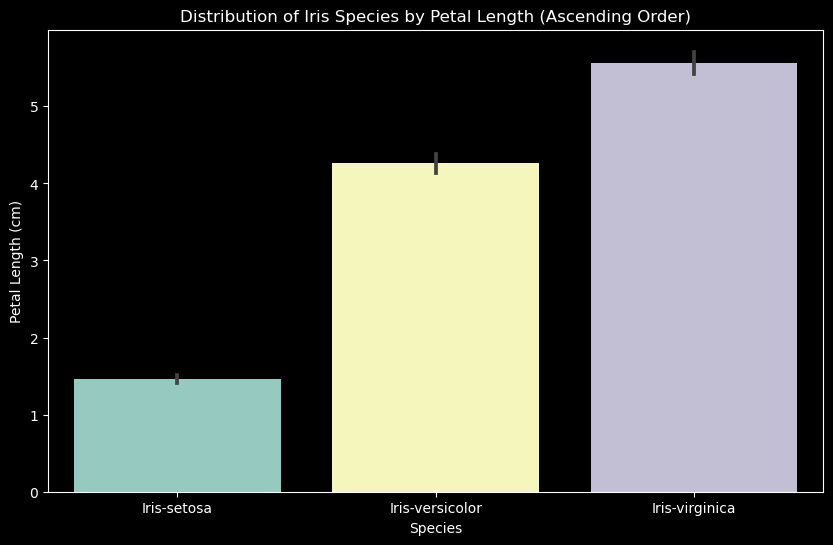

In [24]:
# Sort species by median petal length in ascending order
sorted_species = df.groupby('species')['petal_length'].median().sort_values().index

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='petal_length', order=sorted_species)
plt.title('Distribution of Iris Species by Petal Length (Ascending Order)')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

$inference$
* 'Setosa' species is noticeably distinct from the other two species. It stands out as the species with the shortest petal length. This distinction makes 'setosa' easy to identify based on petal length alone.
* Correlation Between Petal Length and Species: The bar plot emphasizes the positive correlation between petal length and species. Longer petals are generally associated with 'virginica,' while shorter petals are typically found in 'setosa
* Petal length is a valuable feature for species classification, especially when distinguishing 'setosa' from the other two species.

### Andrews_curves

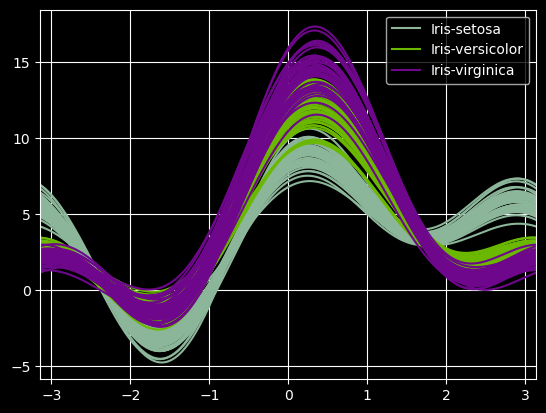

In [25]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species");

Andrews Curves highlight the distinctive patterns for each species. 

$inference$
* The separation between the curves of different species indicates that these features are effective in discriminating between species. The 'setosa' species exhibits the most distinct pattern, followed by 'versicolor' and 'virginica,' which are also distinguishable but with some overlap.
* 'setosa' is the most distinguishable species.

### Correlation Matrix

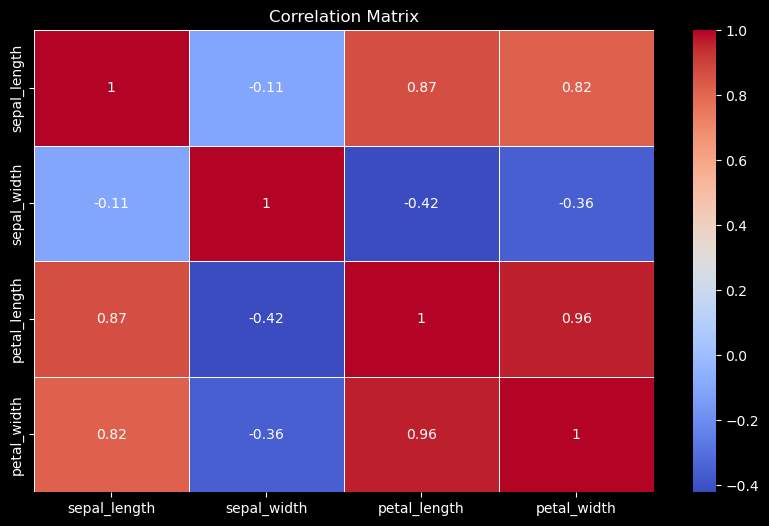

In [26]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

$inference$
* Strong Positive Correlations: Sepal length is strongly positively correlated with petal length (0.87) and petal width (0.82), indicating that as sepal length increases, petal measurements tend to increase as well.
* Moderate Negative Correlations: Sepal length and sepal width have a moderate negative correlation (-0.11), as do sepal width with petal length (-0.421) and petal width (-0.356), implying slight decreases in sepal width associated with sepal length and petal characteristics.
* Strong Positive Correlation Between Petal Characteristics: Petal length and petal width exhibit a strong positive correlation (0.961), meaning they tend to increase together, highlighting their strong association.

## **Data Preprocessing**

### Data Splitting
Split the dataset into training and testing sets for model evaluation.

In [27]:
X = df.drop('species', axis=1)
y = df['species']

In [28]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Feature Scaling
Scale the numerical features to ensure they have a similar scale

In [29]:
# scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define the column names based on your original DataFrame
column_names = df.columns[:-1]  # Exclude the 'species' column

# Create a DataFrame from the scaled X
X_scaled = pd.DataFrame(X, columns=column_names)

# Check the first few rows of the scaled data
X_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### Encoding Categorical Data
The 'species' column, representing the target variable, is categorical and needs to be Encoded into numerical values for modeling.

In [30]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Train-Test Split 

In [31]:
# Split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##  **Modeling**

### Model 1: Logistic regression 
Logistic Regression is a good choice for the Iris classification problem due to its simplicity, efficiency, and good performance on this particular dataset. It provides a solid baseline model for classification tasks, and if the dataset is linearly separable, it can perform exceptionally wel

In [71]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [72]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.97


The model is performing well on both the training and test data, and it is not overfitting. The test accuracy is even higher than the training accuracy, which is a good sign that the model generalizes well to unseen data

In [76]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix (Test Data):
 [[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


The model performed exceptionally well with high precision, recall, and F1-scores for each class. The weighted average F1-score is 97%, indicating strong overall performance. The confusion matrix also shows that the model made very few errors, with most of the data points correctly classified.

### Model 2: The Support Vector Classifier Model 
The Support Vector Classifier (SVC) is a powerful machine learning algorithm used for classification tasks. It is part of the broader family of Support Vector Machines (SVMs)
SVC is a good choice for handling the three-class classification task. It can find an optimal decision boundary to separate the different species based on sepal and petal measurements, and it is robust to outliers and non-linearities in the data. 

In [101]:
# Create an SVM model
model = SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### SVC Model Evaluation

In [102]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.97
Test Accuracy: 0.97


In [94]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix (Test Data):
 [[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


SVC achieved similar performance to the Logistic Regression model for Iris classification. Both models obtained a test accuracy of 97%, with precision, recall, and F1-scores close to 1.00 for Iris-setosa and high values for Iris-versicolor and Iris-virginica. Both models maintained an accuracy of 97% on the test dataset

### Random Forest Model   
The Random Forest model is a powerful and versatile ensemble learning algorithm used for both classification and regression tasks.Random Forest can be an excellent choice for this. It can handle multi-class classification tasks, handle high-dimensional data, and offer robustness to outliers. 


In [97]:
# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Random Forest Model Evaluation

In [98]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.93


In [99]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix (Test Data):
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


The model achieves high accuracy on both the training and test datasets, indicating its ability to accurately classify Iris flowers. However,it is overfitting  as the training accuracy is 100%, 

### Model Comparison 


All three models perform well in classifying Iris flower species based on sepal and petal measurements. They all achieve high accuracy on the test data, indicating their ability to accurately classify the species.Random forest model is overfitting which makes it less favourable than both logistic regression and SVC which has similar performance.
I will hyperparameter tune the Logistic Regression Model and this will be our final model to be used.

### Model 4 : Hyperparameter Tuning Of Logistic Regresion Model

In [86]:
# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear'],  # Use 'liblinear' for l1 penalty
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, y_train)


Best Hyperparameters: {'C': 100, 'solver': 'liblinear'}


LogisticRegression(C=100, solver='liblinear')

### Tuned Logistic Regression Model Evaluation

In [88]:
# Evaluate the model on the training data
train_predictions = best_classifier.predict(X_train)
train_accuracy = best_classifier.score(X_train, y_train)
train_confusion = confusion_matrix(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions, target_names=class_names)

# Evaluate the model on the test data
test_predictions = best_classifier.predict(X_test)
test_accuracy = best_classifier.score(X_test, y_test)
test_confusion = confusion_matrix(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions, target_names=class_names)

In [90]:
# Display the evaluation results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nConfusion Matrix (Training Data):\n", train_confusion)
print("\nClassification Report (Training Data):\n", train_classification_report)


Training Accuracy: 0.9572649572649573
Test Accuracy: 0.9666666666666667

Confusion Matrix (Training Data):
 [[37  0  0]
 [ 0 38  2]
 [ 0  3 37]]

Classification Report (Training Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.93      0.95      0.94        40
 Iris-virginica       0.95      0.93      0.94        40

       accuracy                           0.96       117
      macro avg       0.96      0.96      0.96       117
   weighted avg       0.96      0.96      0.96       117



In [91]:
print("\nConfusion Matrix (Test Data):\n", test_confusion)
print("\nClassification Report (Test Data):\n", test_classification_report)



Confusion Matrix (Test Data):
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The tuned model appears to be the better model. It achieves slightly higher accuracy on the test data, and its F1-scores and confusion matrix suggest it has better precision and recall.
The tuned logistic regression model demonstrates strong performance both in the training and test datasets

The tuned logistic regression model exhibits exceptional performance in classifying Iris flowers into their respective species based on sepal and petal measurements. It achieves high accuracy, precision, and recall both on the training and test datasets, demonstrating strong generalization and a lack of overfitting. This model is a reliable and robust choice for the task of Iris flower species identification.

## Conclusions


* Model Selection: The project recommends choosing either Logistic Regression or Support Vector Classifier (SVC) for the final model, as both outperformed Random Forest in terms of test accuracy.
* Hyperparameter Tuning: Hyperparameter tuning, especially for the Logistic Regression model, is advised to enhance accuracy, precision, and recall.
* 'versicolor' is the most frequently occurring species in the dataset, followed by ''virginica,' and  'setosa'. This indicates that 'versicolor' specimens are the most abundant, while 'setosa' specimens are the least common among the Iris flowers
* 'Setosa' species exhibits a clear distinction from the other two species in terms of sepal length and sepal width
'setosa' has the narrowest petal widths, 'versicolor' falls in the mid-range, and 'virginica' has the widest petals.
* 'setosa' is the most distinguishable species.



Conclusions: The project successfully addressed Iris species classification, with Logistic Regression as the top-performing model. Data preprocessing, feature scaling, and hyperparameter tuning contributed to the model's success. The model is a valuable tool for botanists, researchers, and educators interested in Iris species classification.